# CT5146 Assignment 2

This task is focused on sentiment classification and span extraction from tweets. Please complete this task and upload your answers to Canvas as an iPython Notebook or a PDF. This assignment is due by 23:59 on December 10th 2023. Late submissions will be penalised by 1% for each day after this date. This is an individual assignment and your work must be your own.

You may use libraries such as SciKit-Learn to complete this assignment, however you should justify the choice of functions from these libraries.

**Summary**

In this task, given a tweet (text) we have two objectives:

1. Sentiment classification: Classify the tweet into one of three classes (positive, negative, neutral).

2. Sentiment span extraction: Extract the sequence of words from the tweet that expresses the given sentiment.

Consider the following example from the train dataset:

| textID | text | selected_text | sentiment |
| ------ | ---- | ------------- | --------- |
| 266b8792a0 |Just broke my favorite necklace  superglue? | Just broke my favorite necklace | negative |
| 8f3e73cf09 | "Screw the reviews, I thought Wolverine was awesome. But not enough Dominic Monaghan for my liking." | I thought Wolverine was awesome. | positive |
|... | ... | ... | ... |
| 266b8792a0 |Just broke my favorite necklace  superglue? | Just broke my favorite necklace | negative |


The dataset is divided into `train`, `dev` and `test` sets. The `train` set is used for the model training, while the `dev` set is used for validation and hyperparameter tuning.

The test dataset has **no sentiment labels**. This dataset split will be used for **leaderboard submission** for sentiment classification modelling, described in section 2.




# 1. Data Analysis
    
## Task 1a

Plot a group bar plot to show the distribution of sentiment classes (positive, negative, neutral) in the train and dev dataset. As shown in the following illustration. `(10 marks)`
    
    
   <img src="https://github.com/gauneg/gauneg.github.io/blob/main/ds1.jpg?raw=true" alt="PLOT EXAMPLE" width="400px"/>



  


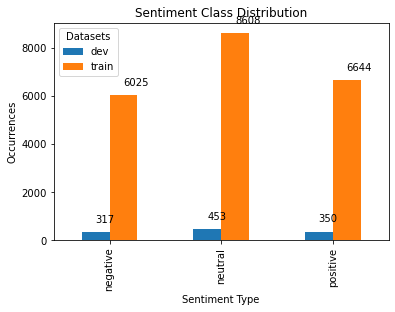

In [1]:
#1A)Bar Chart
import pandas as pd
import matplotlib.pyplot as plt

#Pull in data from train/dev files and distinguish
train_csv = 'C:/Users/Cathal/NLP_A2_Datasets/train.csv'
dev_csv = 'C:/Users/Cathal/NLP_A2_Datasets/dev.csv'
train_df = pd.read_csv(train_csv)
dev_df = pd.read_csv(dev_csv)

train_df['dataset'] = 'train'
dev_df['dataset'] = 'dev'

#Convat df's
concat_data = pd.concat([train_df, dev_df])

#Count frequency
sentiment_freq = concat_data.groupby(['sentiment', 'dataset']).size().unstack()

#Plot chart
barchart = sentiment_freq.plot(kind='bar')

for x in barchart.patches:
    barchart.annotate(str(x.get_height()), (x.get_x() + x.get_width() / 2., x.get_height()), xytext=(0, 10), textcoords='offset points')

#Add additional details for the bar chart - legend, xlabel, etc.
plt.title('Sentiment Class Distribution')
plt.legend(title='Datasets', loc='upper left')
plt.xlabel('Sentiment Type')
plt.ylabel('Occurrences')

plt.show()


# 2. Sentiment Classification

## Task 2a

Train a sequence classification model. The model should take the `text` as input and return one out of 3 sentiment classes: `negative`, `neutral` or `positive`.



<img src="https://github.com/gauneg/gauneg.github.io/blob/main/sentiment_classification.png?raw=true" alt="PLOT EXAMPLE" width="500px"/>

    
INPUT : (`text`)

OUTPUT: `sentiment_class` i.e. one class from `(positive, negative, neutral)`


* You should preprocess the data in the training and development sets and extract feature vectors using either bag-of-words or TF-IDF. `(15 marks)`
* Using these features please train a classifier using a method such Support Vector Machines (SVM) `(10 marks)`

Please provide an  implementation along with an **explanation** (no more than 5 0 words) of the method used and any libraries you used to do this.

## Task 2b

Use the `text` and `sentiment` of the dev set to calulate the efficiency of your model by calculating the following metrics for each class:
    
- Precision

- Recall

- F1 Score
    
Considering it is a multi-class classification task, you should also report the macro-average scores in your implementation of the automatic metrics.
Please provide an implementation along with an **explanation** (no more than 50 words) of the method used. `(5 marks)`


## Task 2c

Based on the methods discussed in the lecture suggest **ONE** improvement or alternative approach that can be applied to the sentiment classification task as in Task 2a. This may be through better feature extraction, new modelling or through an alternaitve methodology.

You should implement this approach and compare the results using the evaluation from Task 2b.

Provide an **explanation** of your approach in no more than 100 words.

`(20 marks)`

## Task 2d
Join the closed kaggle competition at this [link](https://www.kaggle.com/t/c485f589d0694836be2dcecd01a7da4a). Follow the instructions. In order to join the competion login to kaggle using your `universityofgalway` email account. Make a successful submission. Apply the system you developed in Task 2c to the test dataset and submit this result. Marks will be awarded based on the quality of the result.

`(10 marks)`

Format of the test set:


| textID | text | selected_text |
| ------ | ---- | ------------- |
| 266b8792a0 |Just broke my favorite necklace  superglue? | Just broke my favorite necklace |
| 8f3e73cf09 | "Screw the reviews, I thought Wolverine was awesome. But not enough Dominic Monaghan for my liking." | I thought Wolverine was awesome. |
|... | ... | ... |
| 266b8792a0 |Just broke my favorite necklace  superglue? | Just broke my favorite necklace |

Format of the submission file `(.csv format)`:


| textID | sentiment |
| ------ | --------- |
| 266b8792a0 | negative |
| 8f3e73cf09 | positive |
|... | ... |
| 266b8792a0 | negative |





In [2]:
#MY ORIGINAL APPRAOCH USES VARIOUS DATA PREPROCESSING STEPS. FEATURE EXTRACTION IS PERFORMED BY TF-IDF METHOD.
#MODEL USED - SVM (SVC)
#PREDICTIONS ARE THEN MADE BASED OFF OF THE TRAIN (TO TRAIN) AND DEV (TO VALIDATE).
#VARIOUS METRICS - PRECISION, RECALL, F-MEASURE ARE USED TO MEASURE THE MODELS PERFORMANCE


#2A + B) PRE-PROCESSING OF TRAIN AND DEV DATASETS
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

#SPLIT 'TEXT' COLUMNS
df_train_text = train_df["text"]
df_dev_text = dev_df["text"]

#TOKENIZATION
train_tokenization = df_train_text.apply(lambda x: word_tokenize(str(x)))
dev_tokenization = df_dev_text.apply(lambda x: word_tokenize(str(x)))

#CONVERT TO LOWERCASE
train_lowercase = train_tokenization.apply(lambda x: [word.lower() for word in x])
dev_lowercase = dev_tokenization.apply(lambda x: [word.lower() for word in x])

#STOPWORD REMOVAL
stopwords = set(stopwords.words('english'))
train_less_stopwords = train_lowercase.apply(lambda x: [word for word in x if word not in stopwords])
dev_less_stopwords = dev_lowercase.apply(lambda x: [word for word in x if word not in stopwords])

#SPECIAL CHARACTER REMOVAL 
special_characters = string.punctuation
train_cleaned = train_less_stopwords.apply(lambda x: [word.translate(str.maketrans("", "", special_characters)) for word in x])
dev_cleaned = dev_less_stopwords.apply(lambda x: [word.translate(str.maketrans("", "", special_characters)) for word in x])

#BLANK SPACE REMOVAL 
train_space_removal = train_cleaned.apply(lambda x: [space for space in x if space != ''])
dev_space_removal = dev_cleaned.apply(lambda x: [space for space in x if space != ''])

#LEMMATIZATION
lemmatizer = WordNetLemmatizer()
train_lemmatized = train_space_removal.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
dev_lemmatized = dev_space_removal.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#2A)FEATURE EXTRACTION - TF-IDF
train_join = train_lemmatized.apply(' '.join)
dev_join = dev_lemmatized.apply(' '.join)

#TF-IDF Approach
tfidf_vectorizer = TfidfVectorizer(max_features=750, token_pattern=r'\b[a-zA-Z]{3,}\b')
train_tfidf_vectorize = tfidf_vectorizer.fit_transform(train_join)
dev_tfidf_vectorize = tfidf_vectorizer.transform(dev_join)

#Convert to DataFrames for better readability
train_tf_idf = pd.DataFrame(train_tfidf_vectorize.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
dev_tf_idf = pd.DataFrame(dev_tfidf_vectorize.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#2A)Classifier - SVM
svm_classifier = SVC(C=0.7, kernel='rbf', random_state=42, class_weight='balanced')

train_sentiment = train_df["sentiment"]
dev_sentiment = dev_df["sentiment"]

#Train SVM on train dataset
svm_classifier.fit(train_tf_idf, train_sentiment)

#Predict on dev dataset
dev_predictions_tf_idf = svm_classifier.predict(dev_tf_idf)

#2B)EVALUATION METRICS
#Precision
precision_tf_idf = precision_score(dev_sentiment, dev_predictions_tf_idf, average='weighted')
print("Precision:", precision_tf_idf)

#Recall
recall_tf_idf = recall_score(dev_sentiment, dev_predictions_tf_idf, average='weighted')
print("Recall:", recall_tf_idf)

#F-Score
f1_tf_idf = f1_score(dev_sentiment, dev_predictions_tf_idf, average='weighted')
print("F-Score:", f1_tf_idf)

Precision: 0.6638926366472899
Recall: 0.6607142857142857
F-Score: 0.6605435986801442


In [ ]:
#MY UPDATED APPRAOCH USES VARIOUS DATA PREPROCESSING STEPS. FEATURE EXTRACTION IS PERFORMED BY BAG OF WORDS METHOD.
#MODEL USED - SVM (SVC)
#PREDICTIONS ARE THEN MADE BASED OFF OF THE TRAIN (TO TRAIN) AND DEV (TO VALIDATE).
#VARIOUS METRICS - PRECISION, RECALL, F-MEASURE ARE USED TO MEASURE THE MODELS PERFORMANCE
#BAG OF WORDS IMPROVED THE ACCURACY OF MY METHOD AS OPPOSED TO USING MY ORIGINAL TF-IDF APPRACH (+5% BETTER SCORES)

#2C)FEATURE EXTRACTION - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

train_join = train_lemmatized.apply(' '.join)
dev_join = dev_lemmatized.apply(' '.join)

#Bag of Words Approach
count_vectorizer = CountVectorizer(max_features=750, token_pattern=r'\b[a-zA-Z]{3,}\b')
train_bag_vectorize = count_vectorizer.fit_transform(train_join)
dev_bag_vectorize = count_vectorizer.transform(dev_join)

# Convert to DataFrames for better readability
train_bow = pd.DataFrame(train_bag_vectorize.toarray(), columns=count_vectorizer.get_feature_names_out())
dev_bow = pd.DataFrame(dev_bag_vectorize.toarray(), columns=count_vectorizer.get_feature_names_out())

svm_classifier = SVC(C=0.7, kernel='rbf', random_state=42, class_weight='balanced')
#Train SVM on train dataset
svm_classifier.fit(train_bow, train_sentiment)

#Predict on dev dataset
dev_predictions_bow = svm_classifier.predict(dev_bow)

#Metrics - Precision, Recall, F-Score
precision_bow = precision_score(dev_sentiment, dev_predictions_bow, average='weighted')

recall_bow = recall_score(dev_sentiment, dev_predictions_bow, average='weighted')

f1_bow = f1_score(dev_sentiment, dev_predictions_bow, average='weighted')

print("Precision BOW", precision_bow)
print("RecalL BOW", recall_bow)
print("F-Score BOW", f1_bow)
print("=================================")
print("Precision TF-IDF", precision_tf_idf)
print("RecalL TF-IDF", recall_tf_idf)
print("F-Score TF-IDF", f1_tf_idf)

#2A)Classifier - SVM
# Create an instance of the SVM classifier
from sklearn.svm import SVC

svm_classifier = SVC(C=0.7, kernel='linear', class_weight='balanced')

train_sentiment = train_df["sentiment"]
dev_sentiment = dev_df["sentiment"]

#Train SVM on train dataset
svm_classifier.fit(train_tf_idf, train_sentiment)

#Predict on dev dataset
dev_predictions_tf_idf = svm_classifier.predict(dev_tf_idf)

#2A)Classifier - SVM
# Create an instance of the SVM classifier
from sklearn.svm import SVC

svm_classifier = SVC(C=0.7, kernel='linear', class_weight='balanced')

train_sentiment = train_df["sentiment"]
dev_sentiment = dev_df["sentiment"]

#Train SVM on train dataset
svm_classifier.fit(train_tf_idf, train_sentiment)

#Predict on dev dataset
dev_predictions_tf_idf = svm_classifier.predict(dev_tf_idf)

Precision BOW 0.6769436130385006
RecalL BOW 0.6741071428571429
F-Score BOW 0.6725100330411757
Precision TF-IDF 0.6638926366472899
RecalL TF-IDF 0.6607142857142857
F-Score TF-IDF 0.6605435986801442


In [ ]:
#2D - KAGGLE
test_csv = 'C:/Users/Cathal/NLP_A2_Datasets/test.csv'
test_df = pd.read_csv(test_csv)

df_test_text = test_df["text"]

#TOKENIZATION
test_tokenization = df_test_text.apply(lambda x: word_tokenize(str(x)))

#CONVERT TO LOWERCASE
test_lowercase = test_tokenization.apply(lambda x: [word.lower() for word in x])

#STOPWORD REMOVAL
test_less_stopwords = test_lowercase.apply(lambda x: [word for word in x if word not in stopwords])

#SPECIAL CHARACTER REMOVAL 
test_cleaned = test_less_stopwords.apply(lambda x: [word.translate(str.maketrans("", "", special_characters)) for word in x])

#BLANK SPACE REMOVAL 
test_space_removal = test_cleaned.apply(lambda x: [space for space in x if space != ''])

#LEMMATIZATION
test_lemmatized = test_space_removal.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

test_join = test_lemmatized.apply(' '.join)

#Bag of Words Approach
count_vectorizer = CountVectorizer(max_features=750, token_pattern=r'\b[a-zA-Z]{3,}\b')
test_bag_vectorize = count_vectorizer.fit_transform(test_join)

# Convert to DataFrames for better readability
test_bow = pd.DataFrame(test_bag_vectorize.toarray(), columns=count_vectorizer.get_feature_names_out())

svm_classifier = SVC(C=0.7, kernel='rbf', random_state=42, class_weight='balanced')
#Train SVM on train dataset
svm_classifier.fit(train_bow, train_sentiment)

#Predict on dev dataset
dev_predictions_bow = svm_classifier.predict(test_bow)

# 3. Span Extraction
## Task 3a


Our goal for this task is to extract the sentiment span, given the text and the given sentiment (true sentiment label) as input. The sentiment span is a subsection of the text that expresses the sentiment that classifies the text overall.

INPUT : (`text`, `sentiment`)

OUTPUT: `selected_text`

<img src="https://github.com/gauneg/gauneg.github.io/blob/main/assignment_diag.png?raw=true" alt="PLOT EXAMPLE" width="500px"/>


1. Describe in no more than 200 words a system that could be used to identify the sentiment span. You should consider the methodology potentially including how features are extracted, what models could be used and what procedures should be used to train the model. `(10 marks)`

2. Implement this system and apply it to the train and development splits of the dataset. `(15 marks)`

## Task 3b

1. Describe an automatic metric that can be used to evaluate the task of span extraction. Implement this metric and use it to evaluate the performance of the system you developed in Task 3a. `(5 marks)`

In [ ]:
#MY APPRAOCH WAS TO USE THE SAME DATA PREPROCESSING STEPS. FEATURE EXTRACTION IS PERFORMED BY BAG OF WORDS METHOD AGAIN.
#MODEL USED - SVM (SVC) TO BE USED AGAIN
#MY AIM WAS TO COMBINE THE 2 FEATURES (TEXT, SNETIMENT) IN ORDER TO HAVE 1 COMBINED FEATURE OF THESE
#I RAN INTO AN ERROR AS MY NUMBER OF FEATURES DID NOT MATCH UP (I BELIEVE SENTIMENT HAD MORE IN IT)
#THIS WOULD BE DUE TO THE FACT THAT IT DIDN'T GO THROUGH AS MUCH DATA PRE-PROCESSING WHICH REMOVED SOME VALUES FOR TEXT
#PREDICTIONS WOULD THEN BE MADE BASED OFF OF THE TRAIN (TO TRAIN) AND DEV (TO VALIDATE).
#VARIOUS METRICS - PRECISION, RECALL, F-MEASURE ARE USED TO MEASURE THE MODELS PERFORMANCE

#3A + B)SENTIMENT SPAN 
#Inputs 'text' (df_train_text + df_dev_text) and 'sentiment' (train_sentiment + dev_sentiment) 
#Output 'selected_text' (df_train_selected_text + df_dev_selected_text)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

df_train_selected_text = train_df["selected_text"]
df_dev_selected_text = dev_df["selected_text"]

#TOKENIZATION
train_tokenization_sentiment = train_sentiment.apply(lambda x: word_tokenize(str(x)))
dev_tokenization_sentiment = dev_sentiment.apply(lambda x: word_tokenize(str(x)))

#CONVERT TO LOWERCASE
train_lowercase_sentiment = train_tokenization_sentiment.apply(lambda x: [word.lower() for word in x])
dev_lowercase_sentiment = dev_tokenization_sentiment.apply(lambda x: [word.lower() for word in x])

#STOPWORD REMOVAL
train_less_stopwords_sentiment = train_lowercase_sentiment.apply(lambda x: [word for word in x if word not in stop_words])
dev_less_stopwords_sentiment = dev_lowercase_sentiment.apply(lambda x: [word for word in x if word not in stop_words])

#SPECIAL CHARACTER REMOVAL 
train_cleaned_sentiment = train_less_stopwords_sentiment.apply(lambda x: [word.translate(str.maketrans("", "", special_characters)) for word in x])
dev_cleaned_sentiment = dev_less_stopwords_sentiment.apply(lambda x: [word.translate(str.maketrans("", "", special_characters)) for word in x])

#LEMMATIZATION
train_lemmatized_sentiment = train_cleaned_sentiment.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
dev_lemmatized_sentiment = dev_cleaned_sentiment.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

#Join
train_join_sentiment = train_lemmatized_sentiment.apply(' '.join)
dev_join_sentiment = dev_lemmatized_sentiment.apply(' '.join)

#Combine the two text inputs in the training set
train_concat = pd.concat([train_join_selected, train_join_sentiment], axis=1)

#Combine the two text inputs in the testing set
dev_concat = pd.concat([dev_join_selected, dev_join_sentiment], axis=1)

#Bag of Words Approach
count_vectorizer = CountVectorizer(max_features=1000, token_pattern=r'\b[a-zA-Z]{3,}\b')
train_bag_vectorize_sentiment = count_vectorizer.fit_transform(train_concat)
dev_bag_vectorize_sentiment = count_vectorizer.transform(dev_concat)

# Convert to DataFrames for better readability
train_bow_sentiment = pd.DataFrame(train_bag_vectorize_sentiment.toarray(), columns=count_vectorizer.get_feature_names_out())
dev_bow_sentiment = pd.DataFrame(dev_bag_vectorize_sentiment.toarray(), columns=count_vectorizer.get_feature_names_out())

svm_classifier = SVC(C=1.0, kernel='linear', random_state=42, class_weight='balanced')

#Train SVM on train dataset
svm_classifier.fit(train_bag_vectorize_sentiment, df_train_selected_text)

#Predict on train dataset
dev_predictions_bow = svm_classifier.predict(dev_bow_sentiment)

#Metrics - Precision, Recall, F-Score
precision_bow_3B = precision_score(dev_predictions_bow, df_dev_selected_text, average='weighted')
recall_bow__3B = recall_score(dev_predictions_bow, df_dev_selected_text, average='weighted')
f1_bow__3B = f1_score(dev_predictions_bow, df_dev_selected_text, average='weighted')

print("Precision BOW", precision_bow_3B)
print("RecalL BOW", recall_bow__3B)
print("F-Score BOW", f1_bow__3B)